# Prediksi Covid19 di Indonesia menggunakan Model Polynomial Regression

Pada kesempatan ini saya akan menggunakan model Polynomial untuk memperkirakan laju penyebaran Covid19 sampai dengan akhir April 2020. Polynomial Regression membuat sekenario terburuk terhadap laju pertumbuhan Covid19, sekenario terburuk dipilih sebagai langkah agar pemerintah dan kita semua lebih serius untuk bersama sama melawan Covid19 ini.

In [ ]:
#start azriel
import pandas as pd #membaca file csv dari dataset
import numpy as np #
import matplotlib.pyplot as plt #memvisualisasikan data covid yg dibaca
import seaborn as sns #bisa dibilang pelengkapnya matpoltlib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
# Assuming you have trained a model and made predictions stored in case_pred
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

Kasus pertama di Indonesia dilaporkan pada 01 Maret 2020, tanggal ini akan kita jadikan sebagai hari ke-0 untuk memulai prediksi

In [ ]:
df = pd.read_csv('confirmed_acc.csv', parse_dates=['date']) #memanggil file csv yang diwadahi dalam variabel df
df = df.iloc[39:] #nampil jumlah kasus dari indeks no.39
df.reset_index(inplace=True) #Mereset indeks DataFrame df agar dimulai dari 0
df['day'] = np.arange(df.shape[0]) #buat kolom baru 'days' digunakan untuk membuat array bilangan bulat
df = df[['date','day','cases']] #Memilih hanya kolom 'date', 'day', dan 'cases' dari DataFrame df dan menyimpan
df

,date,day,cases
0,2020-03-01,0,0
1,2020-03-02,1,2
2,2020-03-03,2,2
3,2020-03-04,3,2
4,2020-03-05,4,2
5,2020-03-06,5,4
6,2020-03-07,6,4
7,2020-03-08,7,6
8,2020-03-09,8,19
9,2020-03-10,9,27


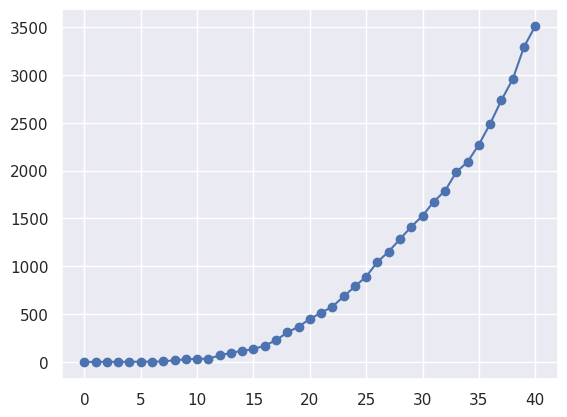

In [ ]:
plt.plot(df['day'],df['cases'],marker='o') #membuat sebuah plot garis menggunakan data dari DataFrame
plt.show()

#end azriel

## Build model polynomial

Model polynomial ini menggunakan polynomial 5 degree

In [ ]:
#start sani
x = np.array(df['day'])

poly = PolynomialFeatures(5, include_bias=False) ## polynomial with 5 degree
poly.fit(x.reshape(-1, 1))
day_poly = poly.transform(x.reshape(-1,1))

In [ ]:
model = LinearRegression()
model.fit(day_poly, df['cases'])
case_pred = model.predict(day_poly)
case_pred

array([-2.65186206e+01,  6.41447838e-01,  1.54509769e+01,  2.12602051e+01,
        2.10308972e+01,  1.73583822e+01,  1.24935913e+01,  8.36509599e+00,
        6.60114628e+00,  8.55170844e+00,  1.53105032e+01,  2.77370439e+01,
        4.64786744e+01,  7.19926069e+01,  1.04567961e+02,  1.44347799e+02,
        1.91351169e+02,  2.45495137e+02,  3.06616830e+02,  3.74495470e+02,
        4.48874416e+02,  5.29483197e+02,  6.16059555e+02,  7.08371482e+02,
        8.06239256e+02,  9.09557478e+02,  1.01831712e+03,  1.13262754e+03,
        1.25273855e+03,  1.37906243e+03,  1.51219598e+03,  1.65294256e+03,
        1.80233411e+03,  1.96165321e+03,  2.13245508e+03,  2.31658969e+03,
        2.51622372e+03,  2.73386264e+03,  2.97237275e+03,  3.23500319e+03,
        3.52540801e+03])

In [ ]:
#end sani
# Calculate R2 score
r2 = r2_score(df['cases'], case_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['cases'], case_pred))

# Print the results
print("R2 score:", r2)
print("RMSE:", rmse)

R2 score: 0.9995262337954618
RMSE: 22.446281046734168


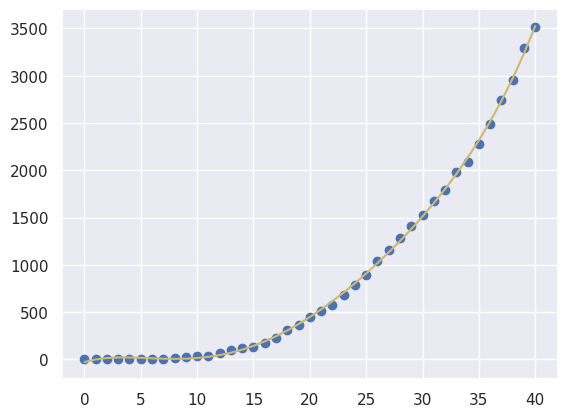

In [ ]:
#start eka
plt.scatter(df['day'],df['cases'],marker='o')
plt.plot(df['day'],case_pred, 'y-')
plt.show()

### Prediksi sampai akhir bulan April 2020

In [ ]:
#end eka
date_pred = pd.date_range('20200408', periods = 23)
day_pred = np.arange(38,38+23)
cases_pred = model.predict(poly.fit_transform(day_pred.reshape(-1,1))).round()

In [ ]:
prediksi = pd.DataFrame({'date_pred': date_pred, 'day_pred': day_pred, 'cases_pred': cases_pred})
prediksi['real'] = np.NaN * 23
prediksi['real'][0:3] = [2956,3293,3512] ## evaluasi prediksi mulai 08 April
prediksi

,date_pred,day_pred,cases_pred,real
0,2020-04-08,38,2972.0,2956.0
1,2020-04-09,39,3235.0,3293.0
2,2020-04-10,40,3525.0,3512.0
3,2020-04-11,41,3848.0,NaN
4,2020-04-12,42,4206.0,NaN
5,2020-04-13,43,4606.0,NaN
6,2020-04-14,44,5053.0,NaN
7,2020-04-15,45,5553.0,NaN
8,2020-04-16,46,6112.0,NaN
9,2020-04-17,47,6738.0,NaN


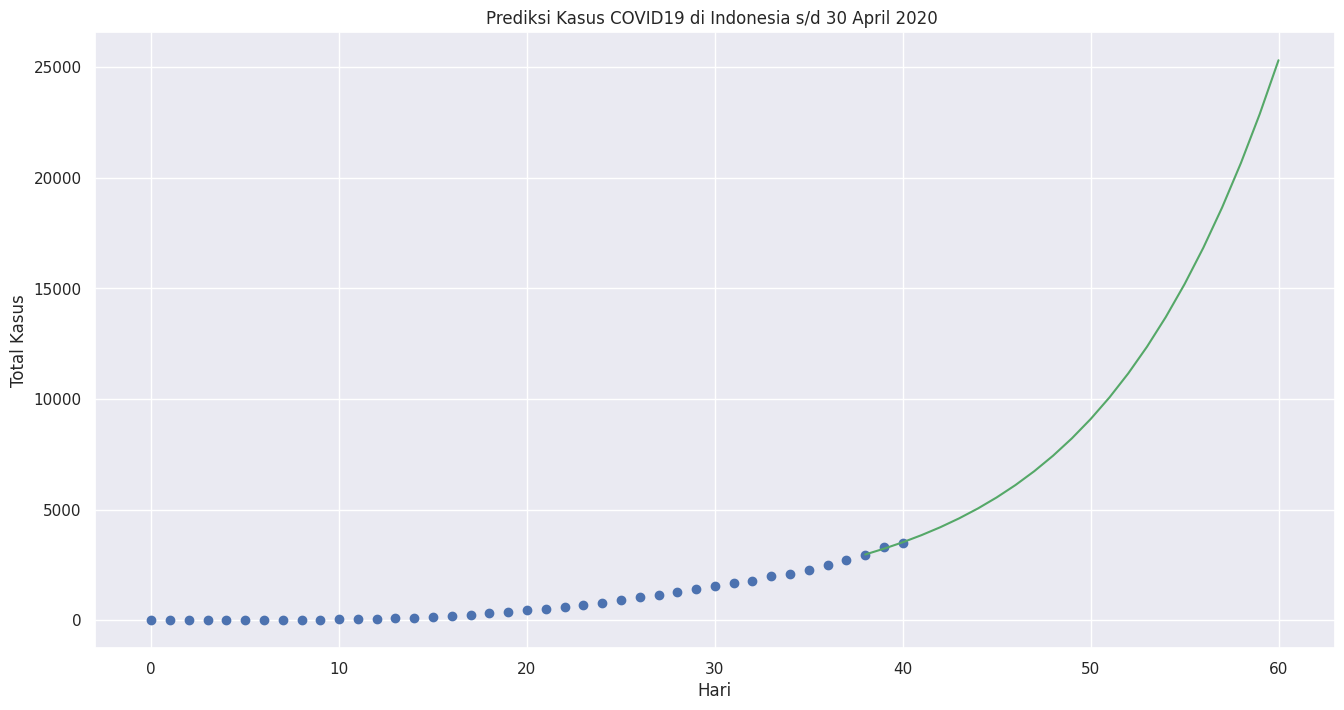

In [ ]:
sns.set()
plt.figure(figsize=(16,8))

plt.scatter(df['day'],df['cases']) #data actual
plt.plot(prediksi['day_pred'],prediksi['cases_pred'], 'g-') #data prediksi
plt.title('Prediksi Kasus COVID19 di Indonesia s/d 30 April 2020 ')
plt.xlabel('Hari')
plt.ylabel('Total Kasus')
plt.savefig('covid19.png') ### save image
plt.show()

Diperkirakan sampai akhir April 2020, kasus COVID19 di Indonesia bisa mencapai 25000 lebih kasus, tentu laju pertumbuhan kasus ini sangat dipengaruhi oleh kebijakan pemerintah dan seberapa disiplin kita untuk bersama sama menekan laju pertumbuhan covid19 ini, semoga kebijakan pemerintah dapat efektif menahan laju kasus covid19 dan laju pertumbuhan kasus covid19 bisa dibawah angka prediksi.